# Hate Speech Detection in Tweets

## Objective
The goal of this task is to classify tweets as containing hate speech (racist/sexist sentiments) or not.

- **Label `1`**: Indicates the tweet contains hate speech (racist/sexist sentiments).
- **Label `0`**: Indicates the tweet does not contain hate speech.

## Motivation
Hate speech is a common issue on the internet, particularly on social media platforms like Facebook and Twitter. Detecting and moderating hate speech is critical due to its strong connection with hate crimes. Early detection of hate speech can prevent escalation and help maintain a safer online environment. Despite its importance, research on hate speech detection in NLP has been limited due to:
1. Lack of a general definition of hate speech.
2. Limited analysis of its demographic influences.
3. Inadequate investigation of effective features for its detection.

## Data Dictionary
The dataset comprises tweets split into training and testing data. The split ratio is **65:35**, where 30% of the test data is public, and the remaining 70% is private.

### Data Files
- **`train_E6oV3lV.csv.csv`**: Contains 31,962 labeled tweets for training. Each line consists of:
  - Tweet ID
  - Label (`0` or `1`)
  - Tweet text

- **`test_tweets_anuFYb8.csv`**: Contains unlabeled test data. Each line consists of:
  - Tweet ID
  - Tweet text

### Submission Files
1. **`test_predictions.csv`**:
   - Contains the predicted labels (`0`/`1`) for the tweets in `test_tweets.csv`.
   - The labels should appear in the same order as the corresponding tweets in the test file, with each label on a new line.

2. **Source Code**:
   - Submit a `.zip` file containing the source code used to generate the predictions.
   - The code must be well-commented.

## Evaluation Metric: F1-Score
The performance of the classification model will be evaluated using the **F1-Score**, which balances precision and recall.

### Definitions
- **True Positives (TP)**: Correctly predicted positive values (actual = yes, predicted = yes).
- **True Negatives (TN)**: Correctly predicted negative values (actual = no, predicted = no).
- **False Positives (FP)**: Incorrectly predicted positive values (actual = no, predicted = yes).
- **False Negatives (FN)**: Incorrectly predicted negative values (actual = yes, predicted = no).

### Formulae
1. **Precision**:  
   Precision = TP / (TP + FP)

2. **Recall**:  
   Recall = TP / (TP + FN)

3. **F1-Score**:  
   F1 = 2 × (Precision × Recall) / (Precision + Recall)

### Notes
- The F1-Score is particularly useful for datasets with uneven class distributions, as it accounts for both false positives and false negatives.


## 1. Understand the Problem Statement

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist, your objective is to predict the labels on the given test dataset.

Note: The evaluation metric from this practice problem is F1-Score.

[Dataset Link](https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/)

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
train  = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [2]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## 2. Tweets Preprocessing and Cleaning

The preprocessing of the text data is an essential step as it makes the raw text ready for mining, i.e., it becomes easier to extract information from the text and apply machine learning algorithms to it. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

### 2.1. Removing Twitter handles

 The tweets contain lots of twitter handles (@user), that is how a Twitter user acknowledged on Twitter. We will remove all these twitter handles from the data as they don’t convey much information.

For our convenience, let’s first combine train and test set. This saves the trouble of performing the same steps twice on test and train.

In [3]:
combi = pd.concat([train, test], ignore_index=True)

Given below is a user-defined function to remove unwanted text patterns from the tweets. It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given pattern. We will use this function to remove the pattern ‘@user’ from all the tweets in our data.

In [4]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

Now let’s create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that we have passed “@[\w]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

In [5]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [6]:
combi

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads..."


### 2.2. Removing Punctuations, Numbers, and Special Characters

Punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles. Here we will replace everything except characters and hashtags with spaces.

In [7]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.tail()

,id,label,tweet,tidy_tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ...","my song ""so glad"" free download! #shoegaze ..."


### 2.3. Removing Short Words

We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [8]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


### 2.4. Tokenization

Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [9]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

,tidy_tweet
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, can't, cause, they, do..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, society, #motivation]"


### 2.5. Stemming

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

In [10]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

,tidy_tweet
0,"[when, father, dysfunct, selfish, drag, kid, i..."
1,"[thank, #lyft, credit, can't, caus, they, don'..."
2,"[bihday, your, majesti]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, societi, #motiv]"


Characters like "urð±!!!" likely represent in the context of tweets.

These are likely the result of improperly decoded or displayed Unicode characters, often emojis.

In [11]:
# Define a function to remove unwanted characters
def remove_unwanted_chars(token_list):
    cleaned_tokens = []
    for token in token_list:
      # Remove emojis and other unwanted characters
      token = re.sub(r'[^\x00-\x7F]+', '', token) # Remove non-ASCII characters
      if token: # Check if token is not empty after cleaning
        cleaned_tokens.append(token)
    return cleaned_tokens

tokenized_tweet = tokenized_tweet.apply(remove_unwanted_chars)

stemmer = PorterStemmer()
stemmed_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
stemmed_tweet.head()

,tidy_tweet
0,"[when, father, dysfunct, selfish, drag, kid, i..."
1,"[thank, #lyft, credit, can't, cau, they, don't..."
2,"[bihday, your, majesti]"
3,"[#model, love, take, with, time, ur!!!]"
4,"[factsguide:, societi, #motiv]"


In [12]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

## 3. Story Generation and Visualization from Tweets


#### 3.1. Understanding the common words used in the tweets: WordCloud

In this section, we will explore the cleaned tweets text. Exploring and visualizing data, no matter whether its text or any other data, is an essential step in gaining insights.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

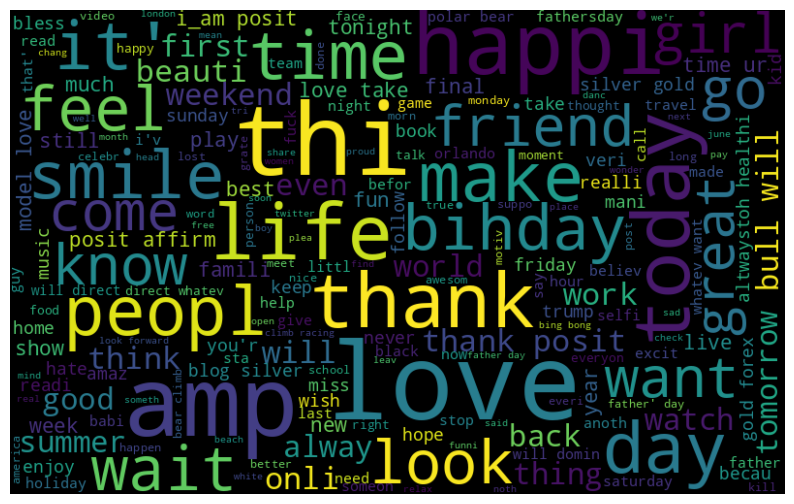

In [13]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### 3.2 Wordclouds for Racist/Sexist Tweets

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

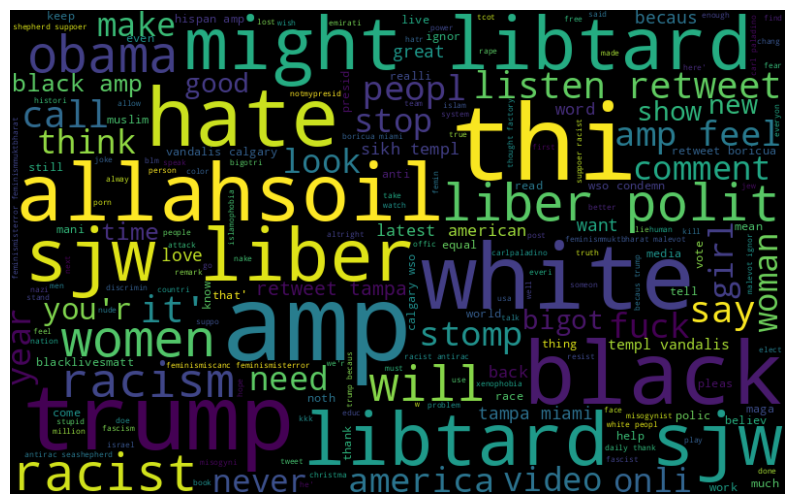

In [18]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### 3.3 Plot distribution of unique words - Histogram

Calculates and visualize the distribution of unique words per tweet, categorized by sentiment.

In essence, the code helps visualize whether there's a difference in the vocabulary diversity between racist/sexist tweets and other tweets.  

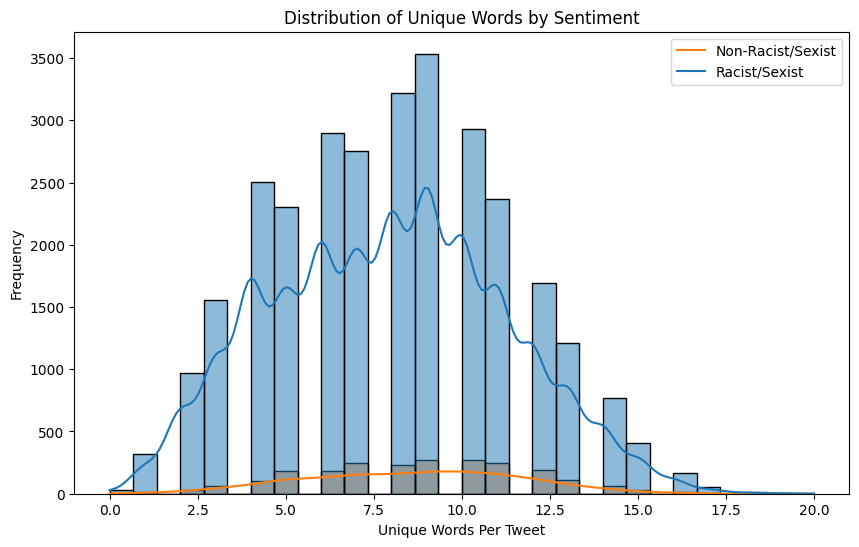

In [14]:
# Calculate unique words per tweet
combi['unique_words'] = combi['tidy_tweet'].apply(lambda x: len(set(x.split())))

# Plot distribution of unique words
plt.figure(figsize=(10, 6))
sns.histplot(data=combi[combi['label'].notnull()], x='unique_words', hue='label', bins=30, kde=True)
plt.title('Distribution of Unique Words by Sentiment')
plt.xlabel('Unique Words Per Tweet')
plt.ylabel('Frequency')
plt.legend(labels=['Non-Racist/Sexist', 'Racist/Sexist'])
plt.show()


#### 3.4. Plot distribution of tweet lengths by sentiment

The code snippet you provided aims to visualize the distribution of tweet lengths, categorized by sentiment (racist/sexist or not). This helps understand if there's a correlation between the length of a tweet and its sentiment.

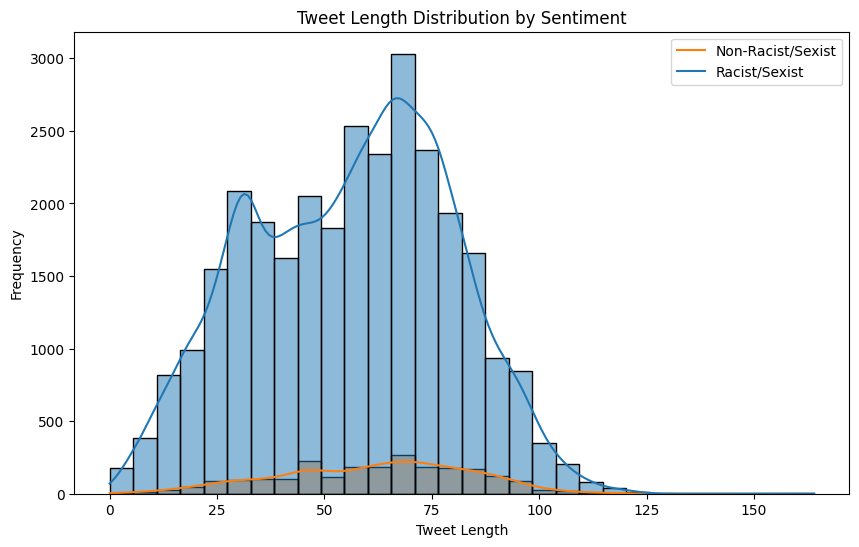

In [15]:
# Add tweet lengths
combi['tweet_length'] = combi['tidy_tweet'].apply(len)

# Plot distribution of tweet lengths by sentiment
plt.figure(figsize=(10, 6))
sns.histplot(data=combi[combi['label'].notnull()], x='tweet_length', hue='label', bins=30, kde=True)
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend(labels=['Non-Racist/Sexist', 'Racist/Sexist'])
plt.show()


#### 3.5. Word frequency distribution

This code aims to identify and visualize the most frequent words (top 15) that appear in the combined dataset of tweets

<ipython-input-16-37a36bf5bba7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_common, x='Frequency', y='Word', palette='viridis')


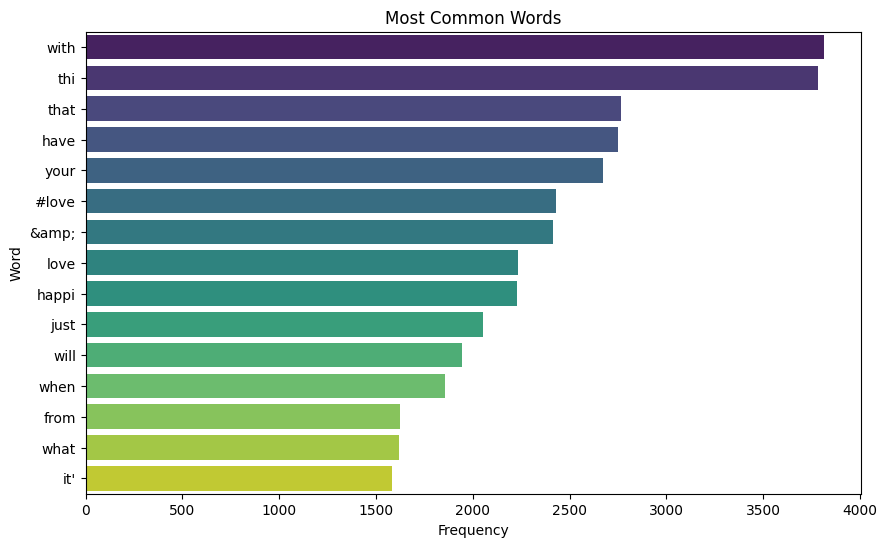

In [16]:
# Word frequency distribution
from collections import Counter
all_words = ' '.join([text for text in combi['tidy_tweet']])
word_freq = Counter(all_words.split())

most_common = word_freq.most_common(15)
df_common = pd.DataFrame(most_common, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(data=df_common, x='Frequency', y='Word', palette='viridis')
plt.title('Most Common Words')
plt.show()


#### 3.6. Understanding the impact of Hashtags on tweets sentiment

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

The tweet seems sexist in nature and the hashtags in the tweet convey the same feeling.

We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [19]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top n hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.



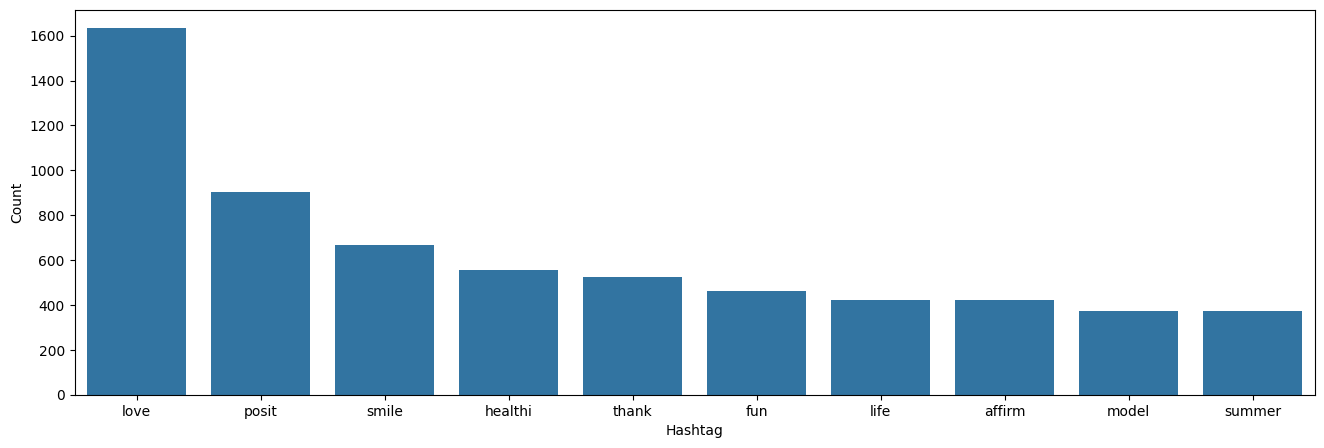

In [20]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list. Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

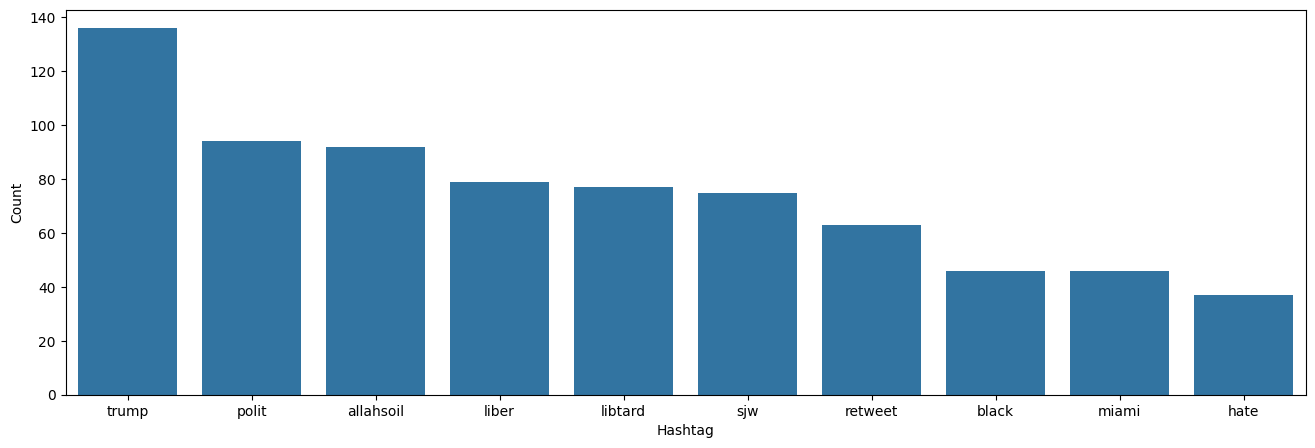

In [21]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## 4. Extracting Features from Cleaned Tweets

To analyze a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag-of-Words, TF-IDF, and Word Embeddings.


#### 4.1. Bag-of-Words Features

Bag-of-Words is a method to represent text into numerical features. Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

#### 4.2 TF-IDF Features
This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

## 5. Model Building: Sentiment Analysis

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. Now we will be building predictive models on the dataset using the two feature set — Bag-of-Words and TF-IDF.

We will use logistic regression to build the models. It predicts the probability of occurrence of an event by fitting data to a logit function.

### 5.1. Building model using Bag-of-Words features

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int64) # Or np.int32
f1_score(yvalid, prediction_int) # calculating f1 score

0.545751633986928

We trained the logistic regression model on the Bag-of-Words features and it gave us an F1-score of 0.55 for the validation set. Now we will use this model to predict for the test data.

In [29]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int64)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

The public leaderboard F1 score is 0.567. Now we will again train a logistic regression model but this time on the TF-IDF features. Let’s see how it performs.

#### 5.2. Building model using TF-IDF features

In [31]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int64)

f1_score(yvalid, prediction_int)

0.5418118466898955

The validation score is 0.542 and the public leaderboard F1 score is 0.564. So, by using the TF-IDF features, the validation score has improved and the public leaderboard score is more or less the same.

We started with preprocessing and exploration of data. Then we extracted features from the cleaned text using Bag-of-Words and TF-IDF. Finally, we were able to build a couple of models using both the feature sets to classify the tweets.